In [6]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import glob
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import  Ridge, LinearRegression

In [3]:
def catToUseful(df):
    newDf = df
    col = df.columns.tolist()
    types = df.dtypes
    for i in range(len(col)):

        if types[i] == 'object' or types[i] == 'str':
            newDf[col[i]] = df[col[i]].astype('category').cat.codes
        else: 
            newDf[col[i]] = df[col[i]]
    return newDf

In [4]:
def dropUnCorr(df, compareCol, threshold):
    new_df = df.drop(compareCol, 1)
    droppedcol = []
    correlation = new_df.corrwith(df[compareCol])
    correlation = correlation.abs().mul(100)
    tempList = list(new_df.columns)
    for i in range(len(correlation)):
        if correlation[i] < threshold:
            droppedcol.append(tempList[i])
            del df[tempList[i]]
             
    return [df,correlation,droppedcol]

In [5]:
wdir = r'C:\Users\noaht\Documents\Data_Mining\Project 3\Data'
os.chdir(wdir)
train_df = pd.read_csv(wdir + r'\train_df.csv')
test_df = pd.read_csv(wdir + r'\test_df.csv')
trainFin = pd.read_csv(wdir + r'\trainReady.csv')
testFin = pd.read_csv(wdir + r'\testReady.csv')

In [5]:
trainFin.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


In [6]:
trainFin.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


In [7]:
testFin.shape

(1459, 80)

In [8]:
X_train = trainFin.loc[:, trainFin.columns!='SalePrice']
Y_train = trainFin['SalePrice']
X_test = catToUseful(testFin)

In [9]:
SGDRegressor_pipe = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('SGDRegressor', SGDRegressor())
]).fit(X_train, Y_train)

sgd_y_pred = SGDRegressor_pipe.predict(X_test)

In [10]:
firstPred = pd.DataFrame()
firstPred['Id'] = X_test['Id']
firstPred['SalePrice'] = sgd_y_pred

In [11]:
firstPred.to_csv('First_Prediction.csv', index = False)

# Result of First Experiment 0.50813 "oof"


# Second Experiment 
   Steps to be taken, 
   Cross coralate, 
   Dummy variables,
   normilization
   

In [12]:
Correlation = trainFin.drop('SalePrice', 1).corrwith(trainFin.SalePrice)
Correlation = Correlation.abs().mul(100)
dope = list(trainFin.columns)

C:\Users\noaht\AppData\Local\Temp/ipykernel_12364/2980171881.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Correlation = trainFin.drop('SalePrice', 1).corrwith(trainFin.SalePrice)


In [13]:
cool = trainFin.copy()
x = dropUnCorr(cool,'SalePrice', 10)

C:\Users\noaht\AppData\Local\Temp/ipykernel_12364/108596373.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  new_df = df.drop(compareCol, 1)


In [14]:
x[0].shape, trainFin.shape

((1460, 53), (1460, 81))

### Plot Correlated data 

In [15]:
data = {'Data': trainFin.drop('SalePrice',1).columns.tolist(), 'Correlation': list(x[1])}
CorrData = pd.DataFrame(data)

C:\Users\noaht\AppData\Local\Temp/ipykernel_12364/3421323952.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = {'Data': trainFin.drop('SalePrice',1).columns.tolist(), 'Correlation': list(x[1])}


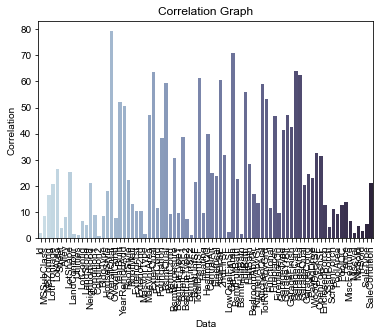

In [16]:
ax = sns.barplot(x = 'Data', y = 'Correlation', data = CorrData, palette="ch:s=.25,rot=-.25")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(title='Correlation Graph', xlabel='Data')
sns.set(rc={"figure.figsize":(20,15)}) 
#try: 
#    fig = ax.get_figure()
#    fig.savefig( 'Correlation' + '.png')
#except:
#    print("error could not save file column:  ")

In [17]:

#testDf = pd.read_csv(wdir + r'\train_noNull.csv')
#testDf.head()


In [18]:
# Create Dummy Variables for catagroical data
#catData = ['Id','SalePrice', 'BsmtFinSF2', 'TotalBsmtSF', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces','GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch' , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
#testDf1 = testDf.drop(catData, 1)
#catCol = testDf.drop(catData, 1).columns
#cool = ['MSSubClass', 'OverallQual', 'OverallCond']
#testDf1[cool] = testDf1[cool].astype(str)
#testDf1.dtypes
#testDf1 = pd.get_dummies(testDf1).head()

In [19]:
def dummyForYear(df, col): 
    for index, row in df.iterrows():
        if df.loc[index, col] <= 1949 and df.loc[index, col] > 0 :
            df.loc[index, col] = "_1949"
        elif df.loc[index, col] >= 1950 and df.loc[index, col]  <= 1959 :
            df.loc[index, col] = '1950_1959'
        elif df.loc[index, col] >= 1960 and df.loc[index, col] <= 1969:
            df.loc[index, col] = '1960_1969'
        elif df.loc[index, col] >= 1970 and df.loc[index, col]  <= 1979:
            df.loc[index,col] = '1970_1979'
        elif df.loc[index, col]  >= 1980 and df.loc[index, col]  <= 1989:
            df.loc[index, col]  = '1980_1989'
        elif df.loc[index, col]  >= 1990 and df.loc[index, col] <= 1999:
            df.loc[index, col]  = '1990_1999'
        elif df.loc[index, col] >= 2000 and df.loc[index, col]  <= 2009:
            df.loc[index, col]  = '2000_2009'
        elif df.loc[index, col]  >= 2010:
            df.loc[index, col]  = '2010_2019'
    return df

In [20]:
testFin.shape

(1459, 80)

In [21]:
#f_df = x[0]
tempVAR = x[2]
f_df = testFin
for i in range(len(tempVAR)):
    del f_df[tempVAR[i]]

f_df.shape

(1459, 52)

In [22]:
yearCol = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
for columnY in yearCol: 
    f_df = dummyForYear(f_df,columnY)


In [23]:
#Create Dummy Variables for catagroical data
#catData = ['SalePrice',  'TotalBsmtSF', 'LotFrontage', 'LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',  'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch' , 'ScreenPorch']
catData = [  'TotalBsmtSF', 'LotFrontage', 'LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',  'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch' , 'ScreenPorch']

testDf1 = f_df.drop(catData, 1)
print(testDf1.shape)
catCol = f_df.drop(catData, 1).columns
testDf1[catCol] = testDf1[catCol].astype(str)
testDf1.dtypes
print(testDf1.shape)
testDf1.head()
testDf1 = pd.get_dummies(testDf1)

(1459, 30)
(1459, 30)


C:\Users\noaht\AppData\Local\Temp/ipykernel_12364/3919648097.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  testDf1 = f_df.drop(catData, 1)
C:\Users\noaht\AppData\Local\Temp/ipykernel_12364/3919648097.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  catCol = f_df.drop(catData, 1).columns


### Normilize continous variables

In [24]:
#cont_vars = f_df[catData].drop('SalePrice',1)
cont_vars = f_df[catData]
scaler = preprocessing.MinMaxScaler()
names = cont_vars.columns
d = scaler.fit_transform(cont_vars)
norm_df = pd.DataFrame(d, columns=names)
norm_df.shape, norm_df.head()

((1459, 22),
    TotalBsmtSF  LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
 0     0.173111        0.400  0.184147    0.000000    0.116708   0.126168   
 1     0.260844        0.405  0.232124    0.083721    0.230175   0.189720   
 2     0.182139        0.370  0.224197    0.000000    0.197257   0.064019   
 3     0.181747        0.390  0.154326    0.015504    0.150125   0.151402   
 4     0.251227        0.215  0.064121    0.000000    0.065586   0.475234   
 
    1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  ...  BedroomAbvGr  \
 0  0.104309  0.000000   0.104309           0.0  ...      0.333333   
 1  0.196672  0.000000   0.196672           0.0  ...      0.500000   
 2  0.111135  0.376477   0.260666           0.0  ...      0.500000   
 3  0.110708  0.364125   0.255333           0.0  ...      0.500000   
 4  0.186220  0.000000   0.186220           0.0  ...      0.333333   
 
    KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
 0           0.5   

### Put the Continous and Catagorial values back together

In [25]:
final_trainDf = pd.concat([test_df.Id, norm_df, testDf1], axis = 1)
final_trainDf.shape

(1459, 224)

In [26]:
#final_trainDf.to_csv('final_trianDf.csv', index = False)
#Code above run twice once with the training once with the test set 
final_trainDf.to_csv('final_testDf.csv', index = False)

# Build Experment 2 model with Refined data 

In [27]:
RefinedTrain = pd.read_csv(wdir + r'\final_trianDf.csv')
RefinedTrain['SalePrice'] = train_df['SalePrice']
RefinedTest = pd.read_csv(wdir + r'\final_testDf.csv')

In [28]:
tempy = ['SalePrice', 'Id']
X_train1 = RefinedTrain.loc[:, RefinedTrain.drop(tempy, axis = 1).columns ]
Y_train1 = RefinedTrain['SalePrice']
X_test1 = RefinedTest.drop('Id', axis = 1)

In [29]:
  set(X_train.columns.tolist()).symmetric_difference(set(X_test.columns.tolist()))

{'3SsnPorch',
 'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtHalfBath',
 'Condition1',
 'Condition2',
 'FireplaceQu',
 'Heating',
 'Id',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'OverallCond',
 'PoolArea',
 'SaleType',
 'Street',
 'Utilities',
 'YrSold'}

In [30]:
test_missingCol = list(set(X_train.columns.tolist()) - (set(X_test.columns.tolist())))
test_missingCol

['MSSubClass',
 'LandContour',
 'PoolArea',
 'BsmtHalfBath',
 'Condition1',
 '3SsnPorch',
 'Alley',
 'MiscVal',
 'Heating',
 'Condition2',
 'Id',
 'BsmtFinType2',
 'Utilities',
 'MiscFeature',
 'YrSold',
 'LowQualFinSF',
 'BsmtFinType1',
 'SaleType',
 'BsmtFinSF2',
 'LotConfig',
 'BldgType',
 'OverallCond',
 'FireplaceQu',
 'Street',
 'LandSlope',
 'BsmtCond',
 'MoSold',
 'MasVnrType']

In [31]:
train_missingCol = list((set(X_test.columns.tolist())) - set(X_train.columns.tolist())) 
train_missingCol 

[]

In [32]:
X_train1[train_missingCol] = 0
X_test1[test_missingCol ]= 0
X_train1.shape, X_test1.shape

((1460, 232), (1459, 251))

In [33]:
SGDRegressor_pipe = Pipeline([
    ('SGDRegressor', SGDRegressor())
]).fit(X_train1, Y_train1)

sgd_y_pred = SGDRegressor_pipe.predict(X_test)

ValueError: could not convert string to float: '_1949'

In [ ]:
secondPred = pd.DataFrame()
secondPred['Id'] = test_df['Id']
secondPred['SalePrice'] = sgd_y_pred

In [ ]:
secondPred.to_csv('Second_Predictions.csv', index = False)

### Result is 3.12961

# Ridge Regression using Orginal Unaltered Data 

In [7]:
X_train = trainFin.loc[:, trainFin.columns!='SalePrice']
Y_train = trainFin['SalePrice']
X_test = catToUseful(testFin)

In [16]:
Ridge_pipe = Pipeline([
    ('StandardScaler', StandardScaler()),
    ('Ridge', Ridge())
]).fit(X_train, Y_train)

ridge_y_pred = Ridge_pipe.predict(X_test)

In [17]:
third_pred = pd.DataFrame()
third_pred['Id'] = X_test['Id']
third_pred['SalePrice'] = ridge_y_pred

In [20]:
third_pred.to_csv('Third_Prediction.csv', index = False)

### Result is Score: 0.46317 